# Image Segmentation- Color and NDVI Threshold

## Written by: Rodrigo Escandon

# Executive Summary

This notebook shows some object detection techniques that are not machine learning based. These techniques will try to predict vegetation in the provided image and mask everything else. The first technique that was used is known as color threshold. This technique uses color ranges to determine what parts in the image should be masked and which ones are displayed. The second technique is used specifically for vegetation on infrared images. The normalized difference vegetation index (NDVI) uses the difference between the infrared band and the red band to determine if a pixel could be a vegetation. Although these techniques can be somewhat effective it is important for the user to have a strong control of the image quality in order for them to perform at a functional level, as the thresholds are static in nature and changes to the image properties can reduce the thresholds effectiveness.

In [1]:
import cv2
import numpy as np
import pandas as pd
import __future__
import matplotlib.pyplot as plt
%matplotlib inline

## Color Threshold

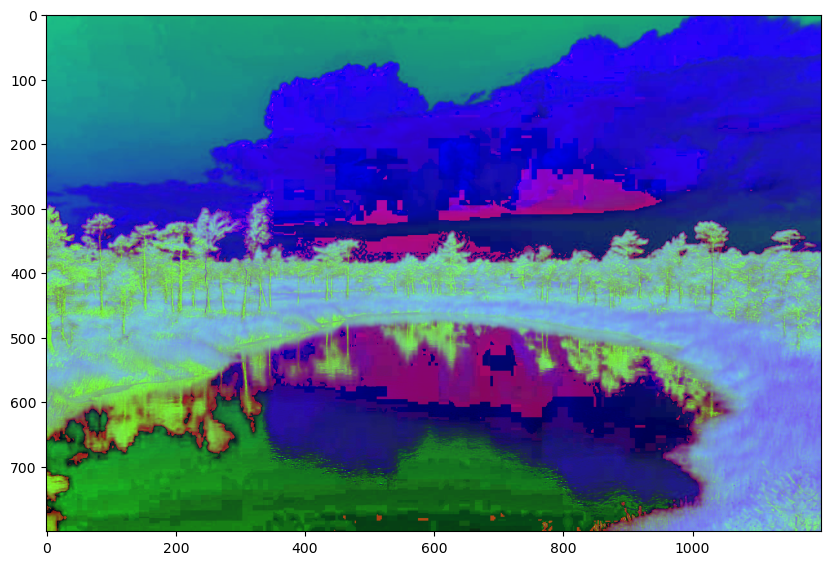

In [2]:
#Upload image and convert image to HSV
#Display HSV image
name='Infrared_2.jpg'
image=cv2.imread('C:\\Users\\Sarah\\Desktop\\Computer_Vision\\'+name)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
fig,(ax1)=plt.subplots(1,1,figsize=(10,10))
plt.imshow(hsv)

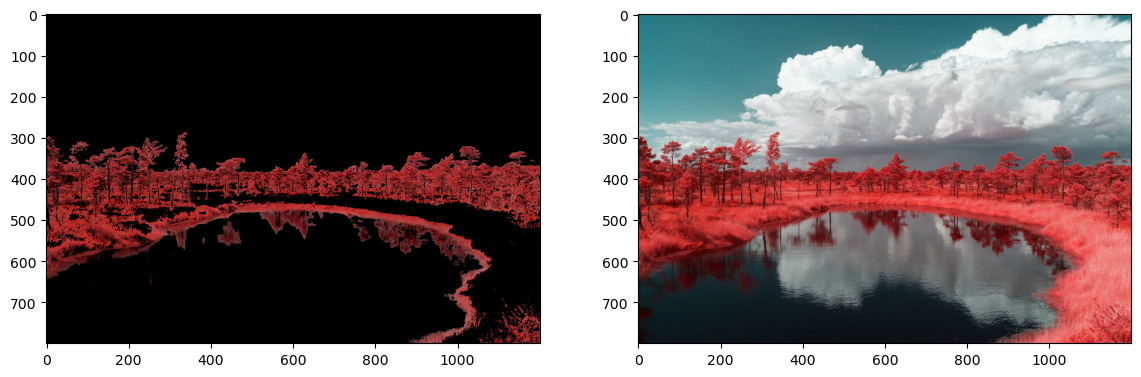

In [3]:
#Applying masking conditions to original image
#Displaying only vegetation that falls within the specified conditions
low_green=np.array([60,96,69])
high_green=np.array([201,222,206])
mask=cv2.inRange(hsv,low_green,high_green)
res=cv2.bitwise_and(image.copy(),image.copy(),mask=mask)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,14))
ax1.imshow(res)
ax2.imshow(image)

## NDVI Threshold

In [4]:
#Creating a function that can calculate the NDVI value for each pixel
#Applying threshold value to make pixels black or white
def pix_cnt(image):
    pix_ndvi=((image[:,:,0].astype(float)-image[:,:,1].astype(float))/
              (image[:,:,0].astype(float)+image[:,:,1].astype(float)))
    pix_ndvi=np.where(pix_ndvi>=0.2,255,0).astype('uint8')
    return pix_ndvi
m_ndvi=pix_cnt(image)

C:\Users\Sarah\AppData\Local\Temp\ipykernel_12508\3217192469.py:4: RuntimeWarning: invalid value encountered in true_divide
  pix_ndvi=((image[:,:,0].astype(float)-image[:,:,1].astype(float))/


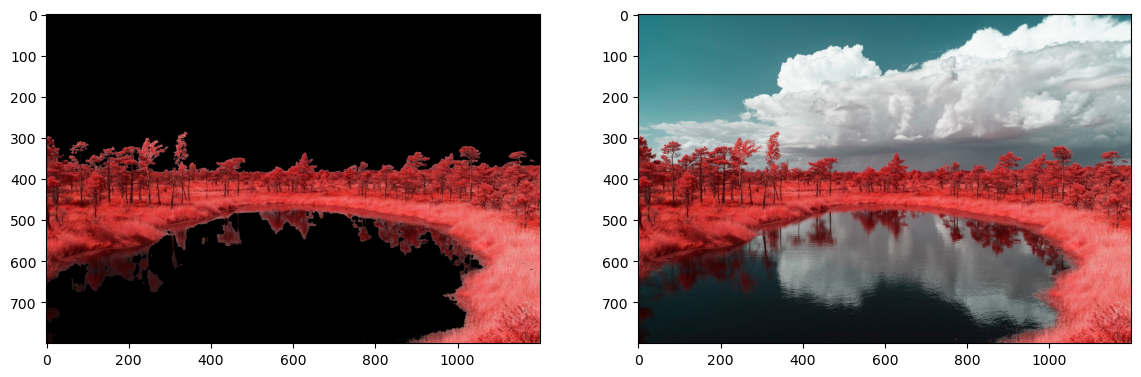

In [5]:
#Applying masking conditions to original image
#Displaying only vegetation that falls within the specified conditions
res_ndvi=cv2.bitwise_and(image,image,mask=m_ndvi)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,14))
ax1.imshow(res_ndvi)
ax2.imshow(image)